## **Exploratory Data Analysis (EDA)**
* In this Notebook, I will perform Exploratory Data Analysis (EDA), performing initial data investigations to discover patterns, spot anomalies and gain insights for further preparation of Machine Learning Model.

**Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**

In [2]:
# Downloading all necessary libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer

**Getting the Data**
* I have manually downloaded the Data. The act of loading and reading the Data might be different in different platforms.

In [3]:
# Loading the Data
# Creating DataFrame from the csv file
PATH = r"C:\\Users\\DELL\\Downloads\\EDA\\Data.csv"
df = pd.read_csv(PATH)

# Observing the DataFrame
df.head(10)

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60
5,A684617,0.0,Intact Female,NaN,10015 Lake Creek Pkwy in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Black,730,730
6,A742354,1.0,Neutered Male,Artemis,9200 N Plaza Dr in Austin (TX),Stray,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Blue/White,2555,2555
7,A681036,0.0,Intact Male,NaN,Hill Croft Drive & Loyola Lane in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,2,2
8,A803149,0.0,Intact Male,*Birch,2607 Garrettson Drive in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair,Brown Tabby,14,21
9,A773792,0.0,Intact Male,NaN,8711 Johnny Morris in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,28,28


**Statistical Exploration**

In [4]:
# Observing the rows and columns of DataFrame or the shape of DataFrame
print(f"The shape of DataFrame is {df.shape}")

The shape of DataFrame is (95485, 13)


In [5]:
# Observing the datatypes and null values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [6]:
# Printing the basic statistics for the Numerical columns
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


In [7]:
# Printing all the columns of the DataFrame
df.columns

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')

**Separating the Features and Target columns**


In [8]:
# Separating the features and target columns
features = df.columns.drop("Outcome Type")
target = "Outcome Type"

print(f"Model Features: {features}")
print(f"Model Target: {target}")

Model Features: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model Target: Outcome Type


**Features Processing**
* I will further explore the features of the DataFrame to separate whether the columns is Categorical or Numerical. Note that some integer valued features could actually be Categorical features and some Categorical features might be text features.

In [9]:
# Selecting the Numerical Features
numerical_features = df[features].select_dtypes(include = np.number).columns
print(f"Numerical Features: {numerical_features}")

print(" ")

# Selecting the Categorical Features
categorical_features = df[features].select_dtypes(include = "object").columns
print(f"Categorical Features: {categorical_features}")

Numerical Features: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')
 
Categorical Features: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


## **Plots:**
* I will observe the Data using plots. These plots ignores the missing values. Dealing with the missing values will be observed later in the Notebook.

**Bar Plots:**
* Bar Plots show the plots of Categorical data. The **value_counts** function yields the counts of each unique value. It is very useful while dealing with categorical variables.

In [10]:
# Looking at the distribution of Model Target
df[target].value_counts()

1.0    53854
0.0    41631
Name: Outcome Type, dtype: int64

* The **plot.bar()** function along with **value_counts()** function makes the bar plots of the values.

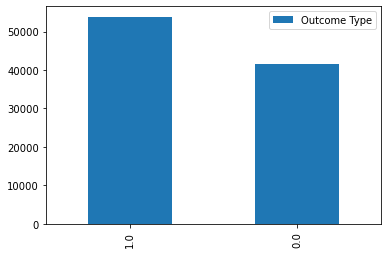

In [12]:
# Plotting the barplot of the distribution of the Model's Target.
df[target].value_counts().plot.bar()
plt.legend()
plt.show()

**Exploring the Categorical Features**
* Exploring the unique values per features in Categorical Features.

In [13]:
# Exploring the unique values per features in Categorical Features.
for C in categorical_features:
    print(df[C].value_counts())

A734537    1
A693912    1
A728380    1
A705747    1
A675467    1
          ..
A758426    1
A679930    1
A767412    1
A733981    1
A713339    1
Name: Pet ID, Length: 95485, dtype: int64
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: Sex upon Outcome, dtype: int64
Bella       338
Luna        313
Max         311
Daisy       239
Lucy        223
           ... 
*Anchovy      1
*Marina       1
Polito        1
Nippy         1
*Camelot      1
Name: Name, Length: 17468, dtype: int64
Austin (TX)                                       14833
Travis (TX)                                        1402
7201 Levander Loop in Austin (TX)                   644
Outside Jurisdiction                                607
Del Valle (TX)                                      426
                                                  ...  
Zilker Park Barton Springs Road in Austin (TX)        1
11805 Oak Haven in Austin (TX)                        1

* Based on the result obtained above, visualization of every unique features is not useful for some of the Categorical Features. For Simplicity and Speed, I will obtain the Visualization of those features whose unique values is less than 50 using bar plots.

Sex upon Outcome


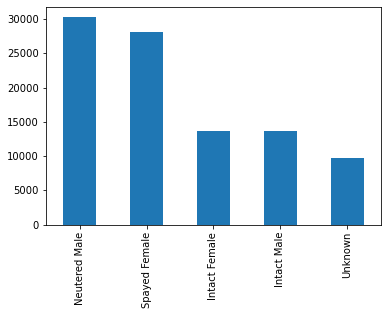

Intake Type


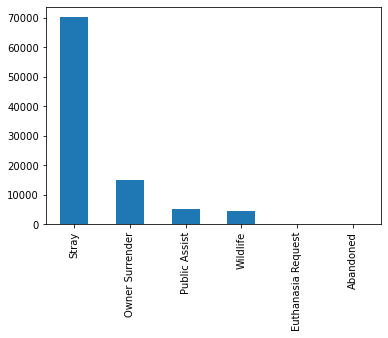

Intake Condition


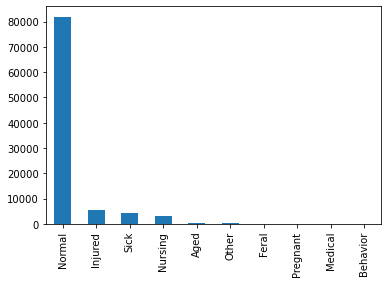

Pet Type


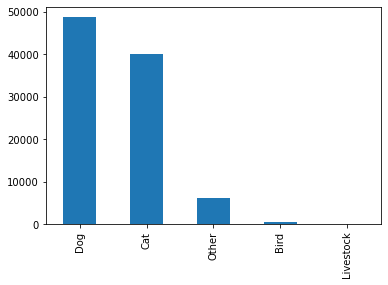

Sex upon Intake


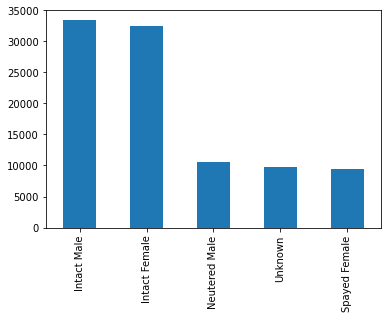

In [14]:
# Visualizing the Features whose unique values is less than 50.
# Plotting the bar plots.
for C in categorical_features:
    if len(df[C].value_counts()) < 50:
        print(C)
        df[C].value_counts().plot.bar()
        plt.show()

### **Histograms**
* Histograms show the distribution of numeric data in which data is divide into bins or buckets.

Age upon Intake Days


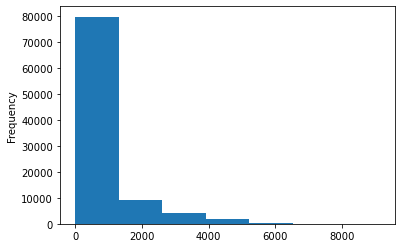

Age upon Outcome Days


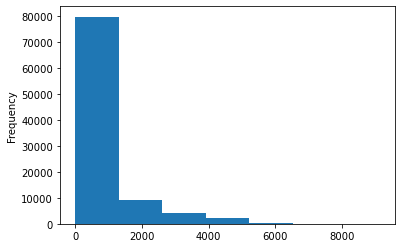

In [16]:
# Plotting the distribution of Numeric data
for N in numerical_features:
    print(N)
    df[N].plot.hist(bins = 7)
    plt.show()

* If, incase of some Histograms, the values are heavily placed in the first bin, the best step is to look for the outliers. Checking the min-max values of those particular features and exploring the value ranges.

In [18]:
# Exploring the value ranges of the Numerical Features
for N in numerical_features:
    print(N)
    print(f"Minimum: {df[N].min()} and Maximum: {df[N].max()}")

Age upon Intake Days
Minimum: 0 and Maximum: 9125
Age upon Outcome Days
Minimum: 0 and Maximum: 9125


* With the help of **value_counts()** function, it is possible to increase the bins of the Histogram.

In [20]:
# Using value_counts function to observe the refined view of the numerical features.
for N in numerical_features:
    print(N)
    print(df[N].value_counts(bins = 10, sort = False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


* If any outliers or wrong values are identified then dropping them could improve the numerical values histograms, and later overall model performance. While a good rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, other rules for removing 'outliers' should be considered as well. For example, removing any values in the upper 1%.

In [21]:
# Removing the outliers from Numerical Features
# Droping the values that is above 90% of maximum
for N in numerical_features:
    print(N)
    dropIndexes = df[df[N] > df[N].max() * 0.9].index
    df.drop(dropIndexes, inplace=True)

Age upon Intake Days
Age upon Outcome Days


In [22]:
# Using value_counts function to observe the refined view of the numerical features.
for N in numerical_features:
    print(N)
    print(df[N].value_counts(bins = 10, sort = False))
    plt.show()

Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: Age upon Outcome Days, dtype: int64


**Plotting Histograms**
* Now, Plotting Histograms with higher visibility.

Age upon Intake Days


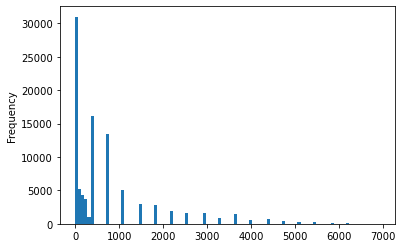

Age upon Outcome Days


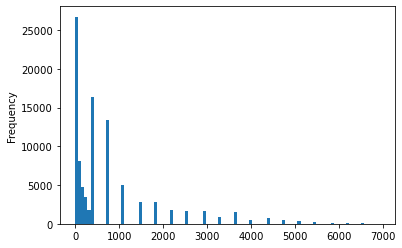

In [23]:
# Plotting Histograms with more visibility
for N in numerical_features:
    print(N)
    df[N].plot.hist(bins = 100)
    plt.show()

### **Scatter Plots and Correlation**
* Scatter Plots are simple 2D plots of two numerical variables that can be used to examine the relationship between two variables.

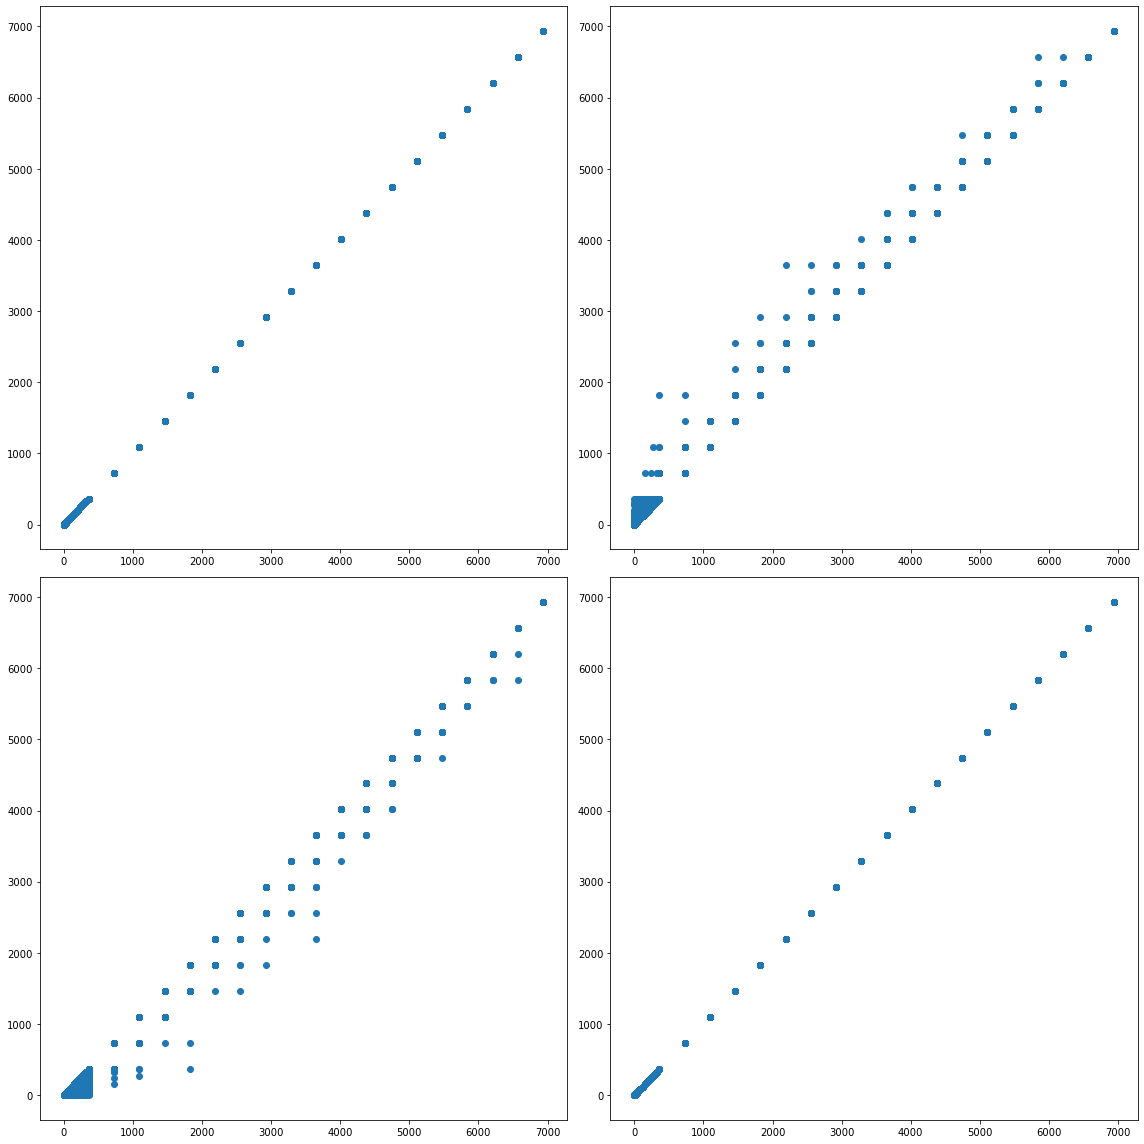

In [24]:
# Plotting the scatter plots to show the relationship between two numerical variables.
fig, axes = plt.subplots(len(numerical_features), len(numerical_features), figsize = (16, 16), sharex = False, sharey = False)
for i in range(0, len(numerical_features)):
    for j in range(0, len(numerical_features)):
        axes[i, j].scatter(x = df[numerical_features[i]], y = df[numerical_features[j]])
fig.tight_layout()

**Scatter Plots with Identification**
* Putting the target values 0 and 1 in the scatter plot.

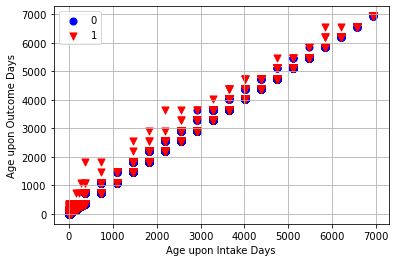

In [25]:
# Putting the target values in the scatter plot
X1 = df[[numerical_features[0], numerical_features[1]]][df[target] == 0]
X2 = df[[numerical_features[0], numerical_features[1]]][df[target] == 1]

plt.scatter(X1.iloc[:, 0],
           X1.iloc[:, 1],
           s = 50,
           c = "blue",
           marker = "o",
           label = "0")

plt.scatter(X2.iloc[:, 0],
           X2.iloc[:, 1],
           s = 50,
           c = "red",
           marker = "v",
           label = "1")
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.legend()
plt.grid()
plt.show()

* Scatter Plots with identification can help to identify whether or not separation can be done between the data points, based on these two Numerical Features,

**Correlation Matrix**
* Correlation matrix and Correlation scores are calculated for Numerical Features.

In [26]:
# Correlation matrix
# Columns 
cols = [numerical_features[0], numerical_features[1]]
df[cols].corr().style.background_gradient(cmap = "tab20c")

,Age upon Intake Days,Age upon Outcome Days
Age upon Intake Days,1.000000,0.998839
Age upon Outcome Days,0.998839,1.000000


* Similar to Scatter plots, the Correlation Matrix also presents the relationship between the numerical features. Correlation values of -1 means the perfect negative correlation and Correlation values of 1 means the perfect positive correlation between the numerical features.

### **Handling Missing Values**
* Missing Values can be handled in various ways:
    * Dropping columns with missing values
    * Dropping rows with missing values
    * Imputing missing values with fillna()
    * Imputing missing values with SimpleImputer

* Checking the missing values in each columns in the DataFrame

In [27]:
# Checking the missing values in each columns
# Sum them together & count 
df.isna().sum()

Pet ID                       0
Outcome Type                 0
Sex upon Outcome             1
Name                     36343
Found Location               0
Intake Type                  0
Intake Condition             0
Pet Type                     0
Sex upon Intake              1
Breed                        0
Color                        0
Age upon Intake Days         0
Age upon Outcome Days        0
dtype: int64

**Dropping Columns**
* Dropping the columns with missing values. If there is significant amount of missing values in the particular column, dropping some columns or features will work. Here, dropping the columns with more than 20% missing values.


In [29]:
# Dropping columns with more than 20% missing values.
threshold = 0.2
print(f"Missing values:\n {df.isna().mean()}")
columns_drop = df.loc[:, list(df.isna().mean() > threshold)].columns

new_df = df.drop(columns_drop, axis = 1)
new_df.head()

Missing values:
 Pet ID                   0.000000
Outcome Type             0.000000
Sex upon Outcome         0.000010
Name                     0.380706
Found Location           0.000000
Intake Type              0.000000
Intake Condition         0.000000
Pet Type                 0.000000
Sex upon Intake          0.000010
Breed                    0.000000
Color                    0.000000
Age upon Intake Days     0.000000
Age upon Outcome Days    0.000000
dtype: float64


,Pet ID,Outcome Type,Sex upon Outcome,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


**Observing the New DataFrame**
* Looking the missing values and shape of the New DataFrame

In [31]:
# Missing values
new_df.isna().sum(), new_df.shape

(Pet ID                   0
 Outcome Type             0
 Sex upon Outcome         1
 Found Location           0
 Intake Type              0
 Intake Condition         0
 Pet Type                 0
 Sex upon Intake          1
 Breed                    0
 Color                    0
 Age upon Intake Days     0
 Age upon Outcome Days    0
 dtype: int64,
 (95462, 12))

* Here, The size of the DataFrame has reduced and this act of dropping the columns may also result in under-fitting of the Model because most of the Data will be lost.

**Dropping Rows**
* Rows with missing values can be dropped easily.

In [32]:
# Dropping the rows with missing values
data = new_df.dropna()
data.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         0
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          0
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [33]:
# Observing the DataFrame
data.shape

(95461, 12)

* Here, the size of the DataFrame has reduced tremendously. This approach may result in over-fitting because the training data may become less than the testing data.

### **Imputing**


**Imputing the Numerical Values**
* The easiest way to impute the Numerical Values is to get the average for the corresponding column and to impute the value in the missing values.

In [35]:
# Imputing Numerical Values
num_df = df.copy()
print(num_df[numerical_features].isna().sum())

num_df[numerical_features] = num_df[numerical_features].fillna(num_df[numerical_features].mean())
print(num_df[numerical_features].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


**Imputing Categorical Values**
* For missing values in Categorical Values, the most common value for the corresponding columns can be used to assign new value for the missing values in that column.

In [38]:
# Imputing the missing values with Mode or most common values
cat_df = df.copy()
print(cat_df[categorical_features].isna().sum())

for C in categorical_features:
    mode_imput = cat_df[C].mode()
    print(C, mode_imput)
    cat_df[C].fillna(False, inplace = True)

print(cat_df[categorical_features].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID 0        A047759
1        A134067
2        A141142
3        A163459
4        A165752
          ...   
95457    A819862
95458    A819864
95459    A819865
95460    A819895
95461    A819908
Length: 95462, dtype: object
Sex upon Outcome 0    Neutered Male
dtype: object
Name 0    Bella
dtype: object
Found Location 0    Austin (TX)
dtype: object
Intake Type 0    Stray
dtype: object
Intake Condition 0    Normal
dtype: object
Pet Type 0    Dog
dtype: object
Sex upon Intake 0    Intact Male
dtype: object
Breed 0    Domestic Shorthair Mix
dtype: object
Color 0    Black/White
dtype: object
Pet ID              0
Sex upon Outcome    0
Name                0
Found Location      0
Intake Type         0
Intake Condition    0
Pe

* Creating new category "Missing" for missing values in Categorical Features.

In [39]:
# Imputing missing values with new category "Missing"
cat_df = df.copy()
print(cat_df[categorical_features].isna().sum())

# Imputing
cat_df[categorical_features] = cat_df[categorical_features].fillna("Missing")
print(cat_df[categorical_features].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID              0
Sex upon Outcome    0
Name                0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64


### **Imputing with SimpleImputer**


**Numerical Values**

In [40]:
# SimpleImputer in Numerical Values
df1 = df.copy()
print(df1[numerical_features].isna().sum())

# Using SimpleImputer
imputer = SimpleImputer(strategy = "mean")
df1[numerical_features] = imputer.fit_transform(df1[numerical_features])
print(df1[numerical_features].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


**Categorical Features**


In [42]:
# Simple Imputer in Categorical Features
df2 = df.copy()
print(df2[categorical_features].isna().sum())

# Using Simple Imputer
imputer = SimpleImputer(strategy = "most_frequent")
df2[categorical_features] = imputer.fit_transform(df2[categorical_features])
print(df2[categorical_features].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID              0
Sex upon Outcome    0
Name                0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64
